In [27]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import warnings
import tfidf
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'tfidf'

1. Cargar y mostrar los datos: Muestra las primeras filas y la informacion general del DataFrame

In [3]:
#Cargo el DataFrame
df_combined = pd.read_parquet('../Datasets/movies_df.parquet')

In [4]:
# Mostrar las primeras filas del DataFrame
print(df_combined.head())

       id                           title release_date  vote_average  \
0   72354           Sunrise at Campobello   1960-09-28           6.3   
1   11802                    Space Chimps   2008-07-17           5.1   
2  271433              Wir sind die Neuen   2014-07-17           6.6   
3  358962  Queen of Spades: The Dark Rite   2015-09-10           5.3   
4  412669                First Round Down   2017-03-04          10.0   

   vote_count    budget     revenue    return  \
0           2         0         0.0  0.000000   
1         102  37000000  63800345.0  1.724334   
2          28         0         0.0  0.000000   
3          10   1000000   2228115.0  2.228115   
4           1         0         0.0  0.000000   

                           spoken_languages  release_year  \
0  [{'iso_639_1': 'en', 'name': 'English'}]          1960   
1  [{'iso_639_1': 'en', 'name': 'English'}]          2008   
2  [{'iso_639_1': 'de', 'name': 'Deutsch'}]          2014   
3  [{'iso_639_1': 'ru', 'nam

In [5]:
# Información general del DataFrame
print(df_combined.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                9837 non-null   int64         
 1   title             9837 non-null   object        
 2   release_date      9837 non-null   datetime64[ns]
 3   vote_average      9837 non-null   float64       
 4   vote_count        9837 non-null   int64         
 5   budget            9837 non-null   int64         
 6   revenue           9837 non-null   float64       
 7   return            9837 non-null   float64       
 8   spoken_languages  9837 non-null   object        
 9   release_year      9837 non-null   int32         
 10  overview          9837 non-null   object        
 11  genres            9837 non-null   object        
 12  actors            9837 non-null   object        
 13  director          9837 non-null   object        
dtypes: datetime64[ns](1), fl

In [6]:
df_combined.describe()

,id,release_date,vote_average,vote_count,budget,revenue,return,release_year
count,9837.000000,9837,9837.000000,9837.000000,9.837000e+03,9.837000e+03,9837.000000,9837.000000
mean,106364.677239,1991-11-07 08:13:36.834400768,5.655586,112.835417,4.291168e+06,1.140682e+07,1.963629,1991.358443
min,3.000000,1891-04-30 00:00:00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1891.000000
25%,25506.000000,1978-01-01 00:00:00,5.000000,3.000000,0.000000e+00,0.000000e+00,0.000000,1978.000000
50%,57993.000000,2000-12-05 00:00:00,6.000000,10.000000,0.000000e+00,0.000000e+00,0.000000,2000.000000
75%,153420.000000,2010-11-12 00:00:00,6.800000,34.000000,0.000000e+00,0.000000e+00,0.000000,2010.000000
max,467731.000000,2018-11-07 00:00:00,10.000000,14075.000000,3.800000e+08,2.787965e+09,12890.386667,2018.000000
std,111740.824616,NaN,1.859041,531.346142,1.795222e+07,6.842863e+07,130.197110,24.441517


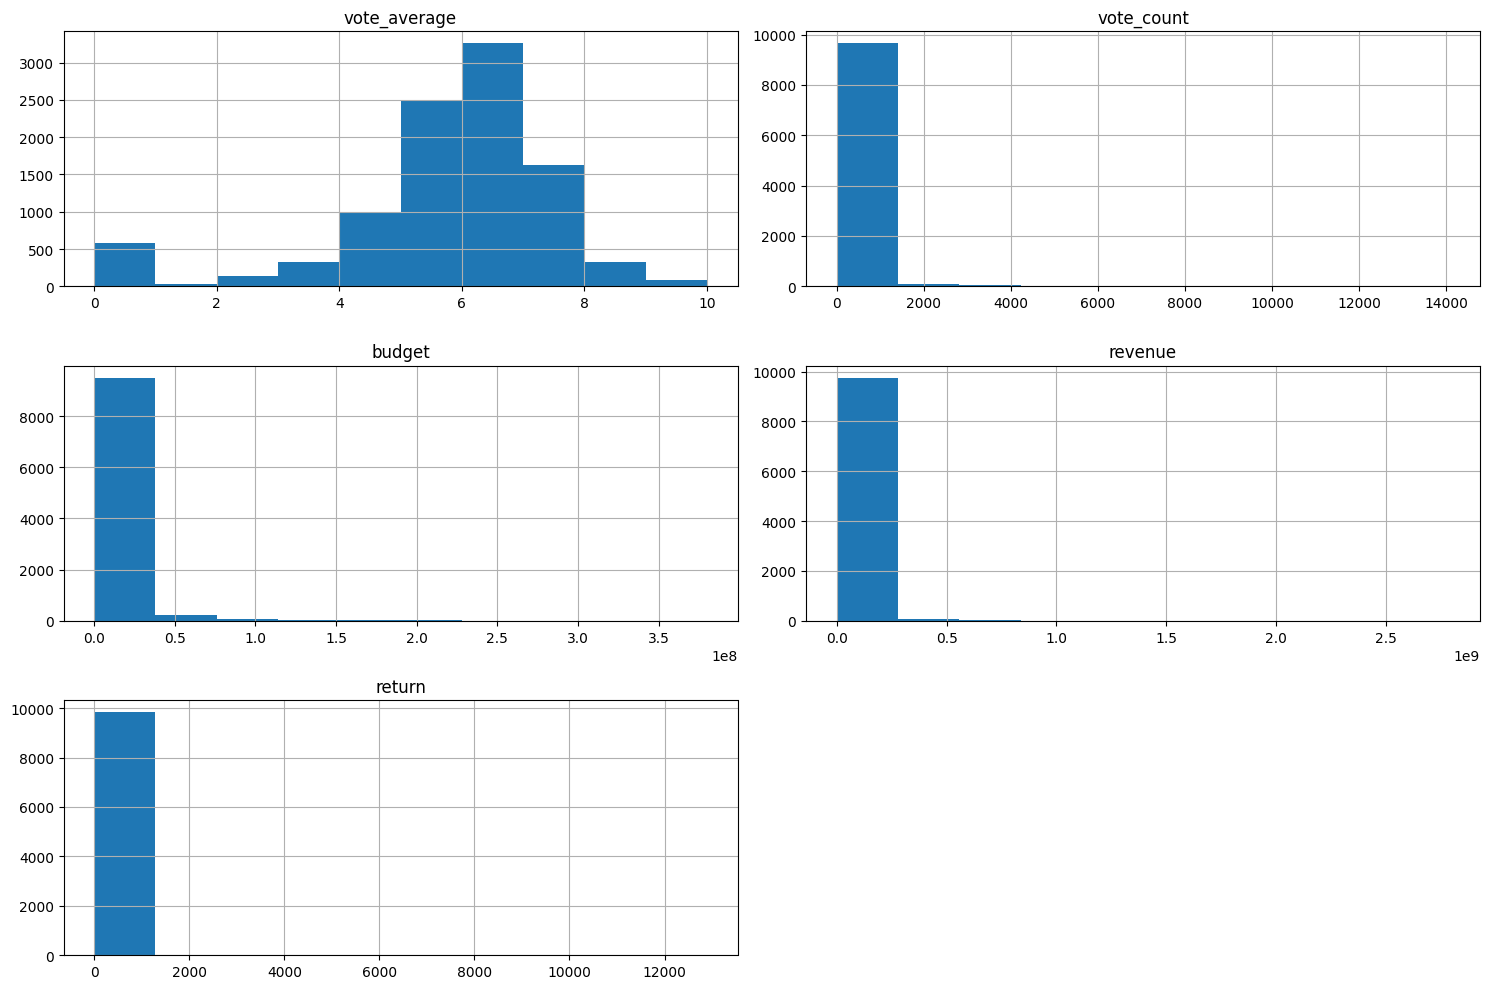

In [7]:
#Revisar la distribucion de variables numericas
numeric_columns = ['vote_average', 'vote_count', 'budget', 'revenue', 'return']
df_combined[numeric_columns].hist(figsize=(15, 10))
plt.tight_layout()
plt.title('Distribucion de variables numéricas')
plt.show()

In [8]:
#Revisar datos faltantes
df_combined.isnull().sum()

id                  0
title               0
release_date        0
vote_average        0
vote_count          0
budget              0
revenue             0
return              0
spoken_languages    0
release_year        0
overview            0
genres              0
actors              0
director            0
dtype: int64

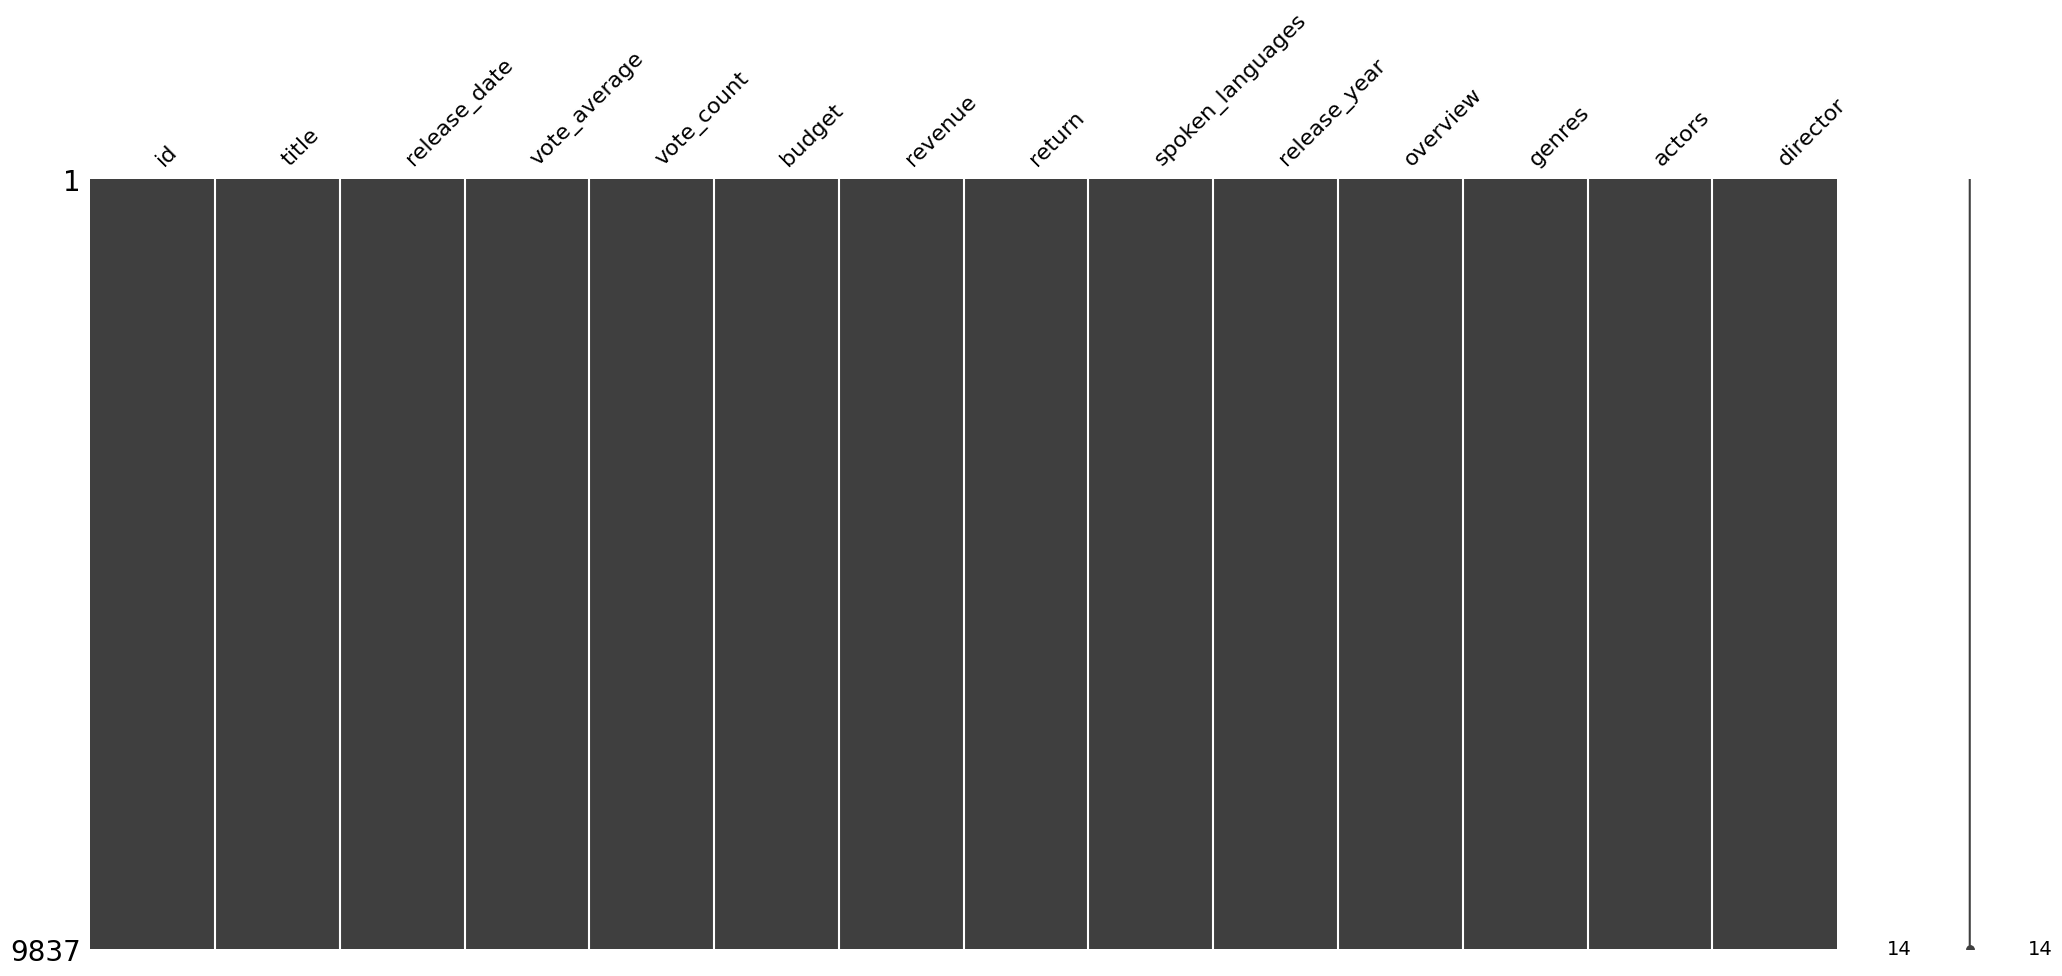

In [9]:
# Visualización de valores faltantes
msno.matrix(df_combined)
plt.show()

In [10]:
#Identificar outliers
columnas_analizar = ['vote_average', 'vote_count', 'budget', 'revenue', 'return']

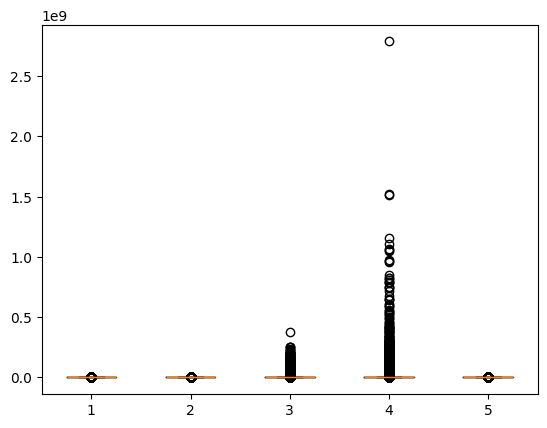

In [11]:
plt.boxplot(df_combined[columnas_analizar])
plt.show()

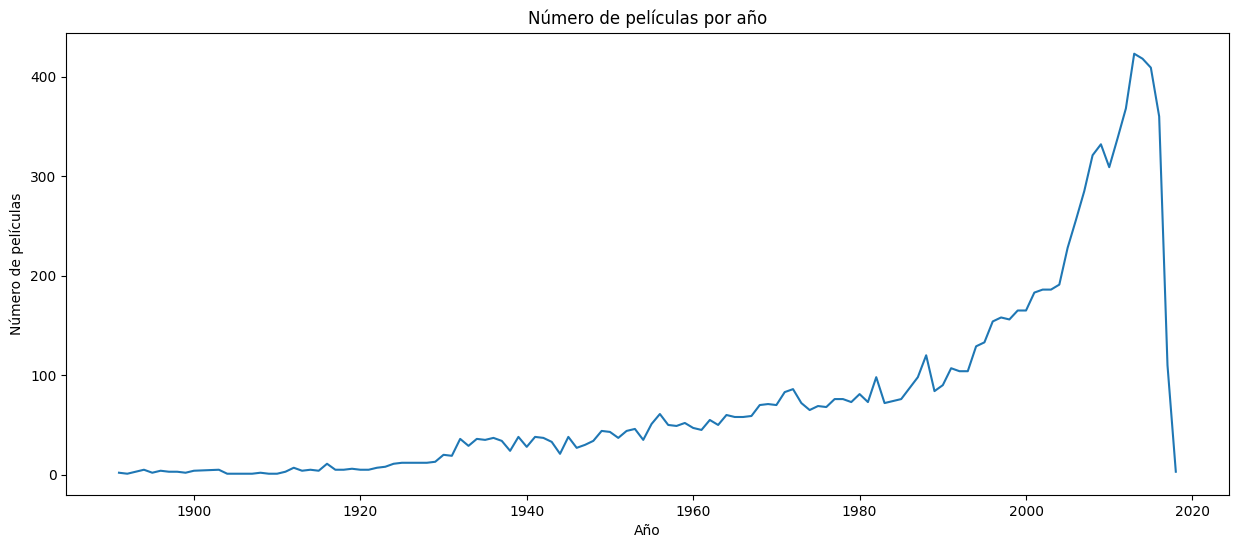

In [12]:
#Revisamos la distribución de películas por año
plt.figure(figsize=(15, 6))
df_combined['release_year'].value_counts().sort_index().plot(kind='line')
plt.title('Número de películas por año')
plt.xlabel('Año')
plt.ylabel('Número de películas')
plt.show()

In [13]:
df_combined['actors'].apply(type)

0       <class 'numpy.ndarray'>
1       <class 'numpy.ndarray'>
2       <class 'numpy.ndarray'>
3       <class 'numpy.ndarray'>
4       <class 'numpy.ndarray'>
                 ...           
9832    <class 'numpy.ndarray'>
9833    <class 'numpy.ndarray'>
9834    <class 'numpy.ndarray'>
9835    <class 'numpy.ndarray'>
9836    <class 'numpy.ndarray'>
Name: actors, Length: 9837, dtype: object

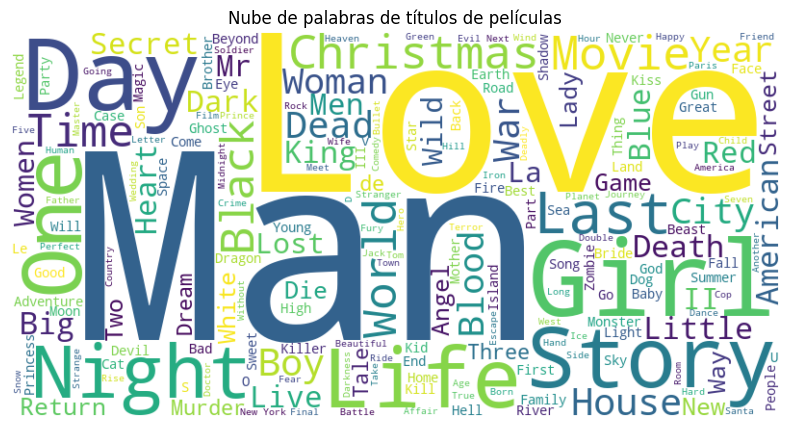

In [14]:
#Nube de palabras para títulos de películas
titles_text = ' '.join(df_combined['title'])
wordcloud_titles = WordCloud(width=800, height=400, background_color='white').generate(titles_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_titles, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras de títulos de películas')
plt.show()

In [15]:
df_combined['genres'].apply(type)

0       <class 'numpy.ndarray'>
1       <class 'numpy.ndarray'>
2       <class 'numpy.ndarray'>
3       <class 'numpy.ndarray'>
4       <class 'numpy.ndarray'>
                 ...           
9832    <class 'numpy.ndarray'>
9833    <class 'numpy.ndarray'>
9834    <class 'numpy.ndarray'>
9835    <class 'numpy.ndarray'>
9836    <class 'numpy.ndarray'>
Name: genres, Length: 9837, dtype: object

In [18]:
#Conviertir a string
def convert_to_string(x):
    if isinstance(x, list):
        return ' '.join(map(str, x))
    elif isinstance(x, np.ndarray):
        return ' '.join(map(str, x.tolist()))
    elif isinstance(x, str):
        return x
    else:
        return str(x)
    
#Aplico la funcion
df_combined['genres'] = df_combined['genres'].apply(convert_to_string)


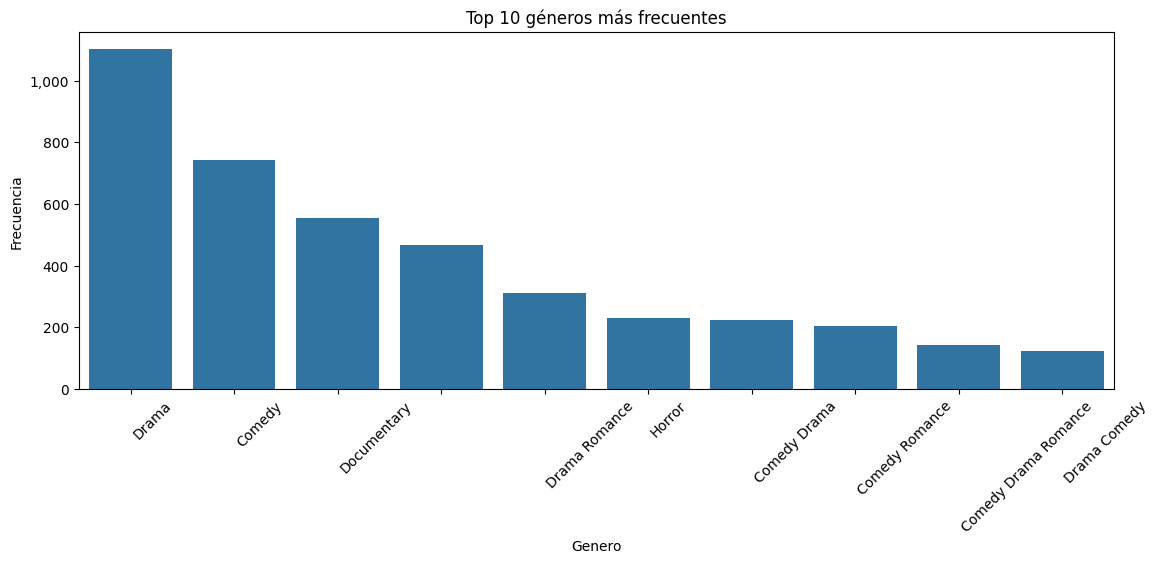

In [19]:
#Revisar generos mas frecuentes
genres = df_combined['genres'].str.split(',', expand=True).stack()
top_genres = genres.value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_genres.index, y=top_genres.values)
plt.title('Top 10 géneros más frecuentes')
plt.xlabel('Genero')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='left')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.tight_layout(pad=2.0)
plt.show()

In [20]:
df_combined.head(5)

,id,title,release_date,vote_average,vote_count,budget,revenue,return,spoken_languages,release_year,overview,genres,actors,director
0,72354,Sunrise at Campobello,1960-09-28,6.3,2,0,0.0,0.000000,"[{'iso_639_1': 'en', 'name': 'English'}]",1960,The story of Franklin Roosevelt's bout with po...,Drama History,"[Ralph Bellamy, Greer Garson, Hume Cronyn, Jea...",Vincent J. Donehue
1,11802,Space Chimps,2008-07-17,5.1,102,37000000,63800345.0,1.724334,"[{'iso_639_1': 'en', 'name': 'English'}]",2008,Circus monkey Ham III works in a circus where ...,Animation Family,"[Andy Samberg, Cheryl Hines, Jeff Daniels, Pat...",Kirk De Micco
2,271433,Wir sind die Neuen,2014-07-17,6.6,28,0,0.0,0.000000,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",2014,Three old friends from college move back in to...,Comedy,"[Gisela Schneeberger, Heiner Lauterbach, Micha...",Ralf Westhoff
3,358962,Queen of Spades: The Dark Rite,2015-09-10,5.3,10,1000000,2228115.0,2.228115,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",2015,There is an ancient ritual known to humankind ...,Thriller Horror Mystery,"[Alina Babak, Valeriya Dmitrieva, Igor Khripun...",Svyatoslav Podgayevskiy
4,412669,First Round Down,2017-03-04,10.0,1,0,0.0,0.000000,[],2017,Tim Tucker (Dylan Bruce) was a star forward wh...,Action Comedy,"[Dylan Bruce, Percy Hynes White]",Brett M. Butler


In [21]:
#Guardo en un nuevo df las columnas para el modelo
df_recomendacion = df_combined[['title', 'genres', 'overview', 'actors', 'director']]

In [22]:
#Combino las características en una sola columna
df_recomendacion['features'] = df_recomendacion['genres'] + ' ' + df_recomendacion['overview'] + ' ' + df_recomendacion['actors'] + ' ' + df_recomendacion['director']

In [24]:
tfidf_matriz = tfidf.fit_transform(df_recomendacion['features'].astype(str))

NameError: name 'tfidf' is not defined

In [22]:
df_recomendacion.to_parquet(r'c:\Users\Usuario\Desktop\Henry curso\Proyecto 1\Datasets\df_recomendacion.parquet', index=False)

In [23]:
df_recomendacion.head(5)

,title,genres,overview,actors,director,features
0,Sunrise at Campobello,Drama History,The story of Franklin Roosevelt's bout with po...,"[Ralph Bellamy, Greer Garson, Hume Cronyn, Jea...",Vincent J. Donehue,[Drama History The story of Franklin Roosevelt...
1,Space Chimps,Animation Family,Circus monkey Ham III works in a circus where ...,"[Andy Samberg, Cheryl Hines, Jeff Daniels, Pat...",Kirk De Micco,[Animation Family Circus monkey Ham III works ...
2,Wir sind die Neuen,Comedy,Three old friends from college move back in to...,"[Gisela Schneeberger, Heiner Lauterbach, Micha...",Ralf Westhoff,[Comedy Three old friends from college move ba...
3,Queen of Spades: The Dark Rite,Thriller Horror Mystery,There is an ancient ritual known to humankind ...,"[Alina Babak, Valeriya Dmitrieva, Igor Khripun...",Svyatoslav Podgayevskiy,[Thriller Horror Mystery There is an ancient r...
4,First Round Down,Action Comedy,Tim Tucker (Dylan Bruce) was a star forward wh...,"[Dylan Bruce, Percy Hynes White]",Brett M. Butler,[Action Comedy Tim Tucker (Dylan Bruce) was a ...
